## GOBAI-O2-v1.0 (vertical mean: 0-200m; 200-600m)

In [1]:
import os
import xarray as xr
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import cm,colors,gridspec,rc
USER = os.environ['USER']

In [2]:
path = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{path}/GOBAI_FOSI_O2_LME_mean_200401-201510_monthly.nc'
ds = xr.open_dataset(filename)
layer1 = '0-200m'
layer2 = '200-600m'
var1 = 'GOBAI_O2'
var2 = 'FOSI_O2'
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

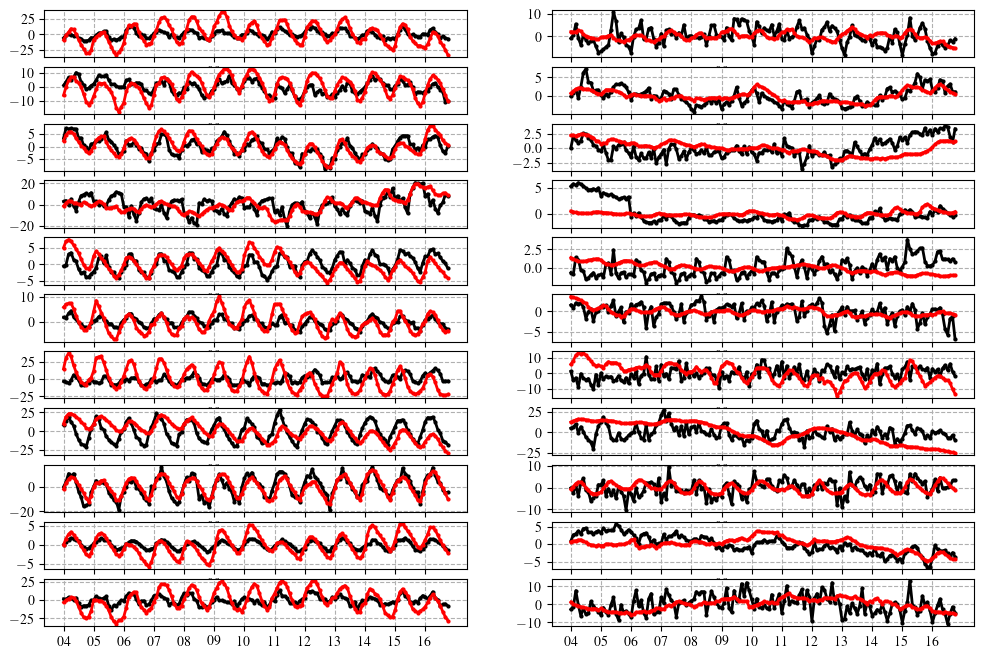

In [3]:
fig = plt.figure(figsize=[12, 8])
gs = gridspec.GridSpec(11, 2) #,width_ratios=[1,1,1,0.00001])
for vv, layer in [[0,layer1],[1, layer2]]:
    for box in range(11):
    #ax = fig.add_axes([0.07,0.05+(1-vv)*0.48,0.8,0.43])
        ax = fig.add_subplot(gs[box,vv])
        O2_obs = ds[f'{var1}_{layer}'].values[box,:]
        O2_mod = ds[f'{var2}_{layer}'].values[box,:]
        #
        ax.plot(range(154),O2_obs-O2_obs.mean(),color='k',lw=2,marker='o',markersize=2)
        ax.plot(range(154),O2_mod-O2_mod.mean(),color='r',lw=2,marker='o',markersize=2)
        #
        #ax.set_xlim(lon_min,lon_max)
        #ax.set_ylim(lat_min,lat_max)
        ax.set_xticks(np.arange(0,154,12))
        ax.set_xticklabels([str(ii)[2:] for ii in range(2004,2017,1)])
        #ax.set_yticks(np.arange(15, 66, 10))
        ax.grid(linestyle='dashed')

output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/GOBAI_FOSI_O2_{layer1}_{layer2}_LME_mean_monthly_timeseries_200401-201510.png'
#plt.savefig(outfile,dpi=400)
plt.show()

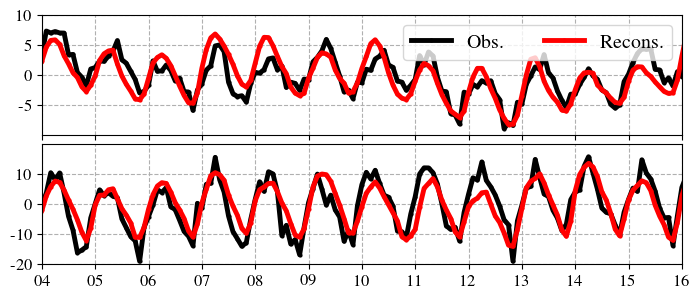

In [6]:
fig = plt.figure(figsize=[8, 3])
gs = gridspec.GridSpec(2, 1) #,width_ratios=[1,1,1,0.00001])
for vv, layer in [[0,layer1]]:#,[1, layer2]]:
    for hh,box in [[0,2],[1,8]]:
    #ax = fig.add_axes([0.07,0.05+(1-vv)*0.48,0.8,0.43])
        #ax = fig.add_subplot(gs[hh,vv])
        ax = fig.add_axes([0.06,0.10+(1-hh)*0.43,0.8,0.4])
        O2_obs = ds[f'{var1}_{layer}'].values[box,:]
        O2_mod = ds[f'{var2}_{layer}'].values[box,:]
        #
        ax.plot(range(154),O2_obs-O2_obs.mean(),color='k',lw=3.5,marker='o',markersize=2)
        ax.plot(range(154),O2_mod-O2_mod.mean(),color='r',lw=3.5,marker='o',markersize=2)
        #
        ax.set_xlim(0,144)
        #ax.set_ylim(lat_min,lat_max)
        ax.set_xticks(np.arange(0,154,12))
        
        if hh == 0:
            ax.set_yticks(np.arange(-5,11,5))
            ax.set_yticklabels([str(ii) for ii in np.arange(-5,11,5)],fontsize=12)
            ax.set_ylim(-10,10)
            ax.set_xticklabels([],fontsize=12)
            ax.legend(['Obs.','Recons.'],loc=0,ncol=2,fontsize='x-large')
        elif hh == 1:
            ax.set_yticks(np.arange(-20,20,10))
            ax.set_yticklabels([str(ii) for ii in np.arange(-20,20,10)],fontsize=12)
            ax.set_ylim(-20,20)
            ax.set_xticklabels([str(ii)[2:] for ii in range(2004,2017,1)],fontsize=12)
        #ax.set_yticks(np.arange(15, 66, 10))
        ax.grid(linestyle='dashed')
        #ax.set_ylabel('O$_2$ Anomaly [mmol kg$^{-1}$]')

output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/GOBAI_FOSI_O2_{layer1}_{layer2}_LME_mean_monthly_timeseries_200401-201512.png'
plt.savefig(outfile,dpi=400)
plt.show()

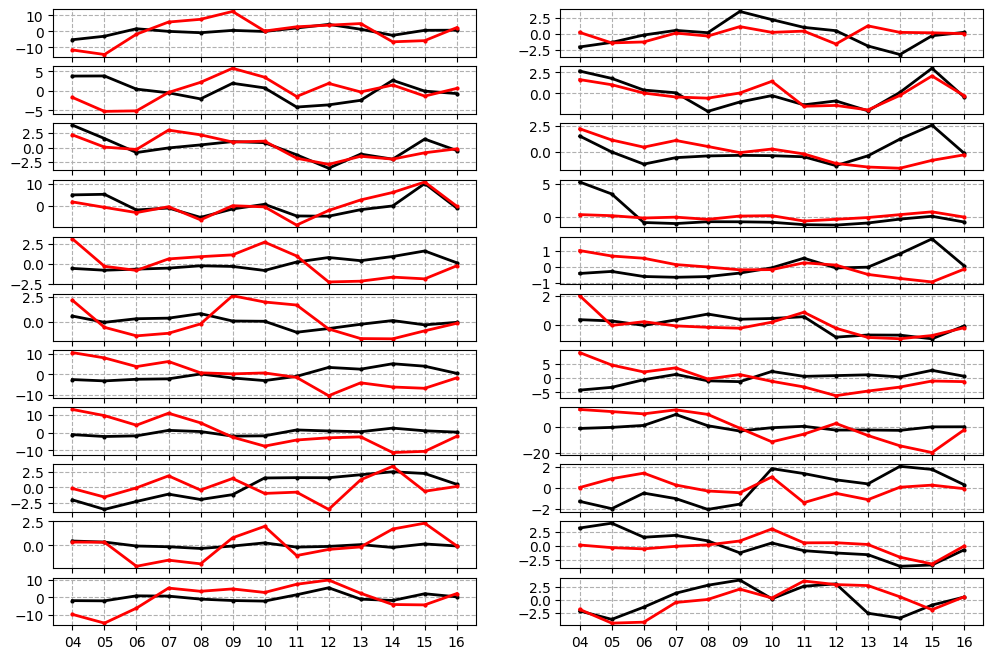

In [5]:
fig = plt.figure(figsize=[12, 8])
gs = gridspec.GridSpec(11, 2) #,width_ratios=[1,1,1,0.00001])
for vv, layer in [[0,layer1],[1, layer2]]:
    for box in range(11):
    #ax = fig.add_axes([0.07,0.05+(1-vv)*0.48,0.8,0.43])
        ax = fig.add_subplot(gs[box,vv])
        O2_obs = ds[f'{var1}_{layer}'].values[box,:]
        O2_mod = ds[f'{var2}_{layer}'].values[box,:]
        #
        O2_obsy = np.reshape(O2_obs[:-10],[12,12])
        O2_obsy = np.mean(O2_obsy,axis=1)
        O2_obsyy = list(O2_obsy) + [np.mean(O2_obsy[-10:])]
        O2_obsyy = np.array(O2_obsyy)
        #
        O2_mody = np.reshape(O2_mod[:-10],[12,12])
        O2_mody = np.mean(O2_mody,axis=1)
        O2_modyy = list(O2_mody) + [np.mean(O2_mody[-10:])]
        O2_modyy = np.array(O2_modyy)
        #
        ax.plot(range(13),O2_obsyy-O2_obsyy.mean(),color='k',lw=2,marker='o',markersize=2)
        ax.plot(range(13),O2_modyy-O2_modyy.mean(),color='r',lw=2,marker='o',markersize=2)
        #
        #ax.set_xlim(lon_min,lon_max)
        #ax.set_ylim(lat_min,lat_max)
        ax.set_xticks(np.arange(0,13,1))
        ax.set_xticklabels([str(ii)[2:] for ii in range(2004,2017,1)])
        #ax.set_yticks(np.arange(15, 66, 10))
        ax.grid(linestyle='dashed')

output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/GOBAI_FOSI_O2_{layer1}_{layer2}_LME_mean_monthly_timeseries_200401-201510.png'
#plt.savefig(outfile,dpi=400)
plt.show()